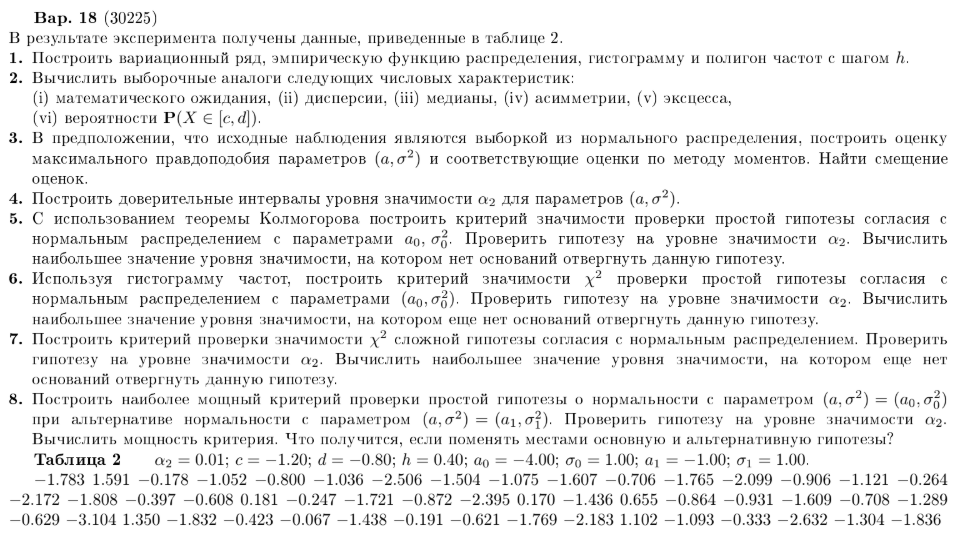

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

x = np.array([
    -1.783, 1.591, -0.178, -1.052, -0.800, -1.036, -2.506, -1.504, -1.075, -1.607, -0.706, -1.765, -2.099, -0.906, -1.121, -0.264,
    -2.172, -1.808, -0.397, -0.608, 0.181, -0.247, -1.721, -0.872, -2.395, 0.170, -1.436, 0.655, -0.864, -0.931, -1.609, -0.708, -1.289,
    -0.629, -3.104, 1.350, -1.832, -0.423, -0.067, -1.438, -0.191, -0.621, -1.769, -2.183, 1.102, -1.093, -0.333, -2.632, -1.304, -1.836
])

alpha2 = 0.01
c, d = -1.2, -0.8
h = 0.4
a0, a1 = -4.0, 1.0
sigma0, sigma1 = 1.0, 1.0

x_sorted = np.sort(x)

# Задание 1

In [2]:
print("Вариационный ряд: ", x_sorted)

Вариационный ряд:  [-3.104 -2.632 -2.506 -2.395 -2.183 -2.172 -2.099 -1.836 -1.832 -1.808
 -1.783 -1.769 -1.765 -1.721 -1.609 -1.607 -1.504 -1.438 -1.436 -1.304
 -1.289 -1.121 -1.093 -1.075 -1.052 -1.036 -0.931 -0.906 -0.872 -0.864
 -0.8   -0.708 -0.706 -0.629 -0.621 -0.608 -0.423 -0.397 -0.333 -0.264
 -0.247 -0.191 -0.178 -0.067  0.17   0.181  0.655  1.102  1.35   1.591]


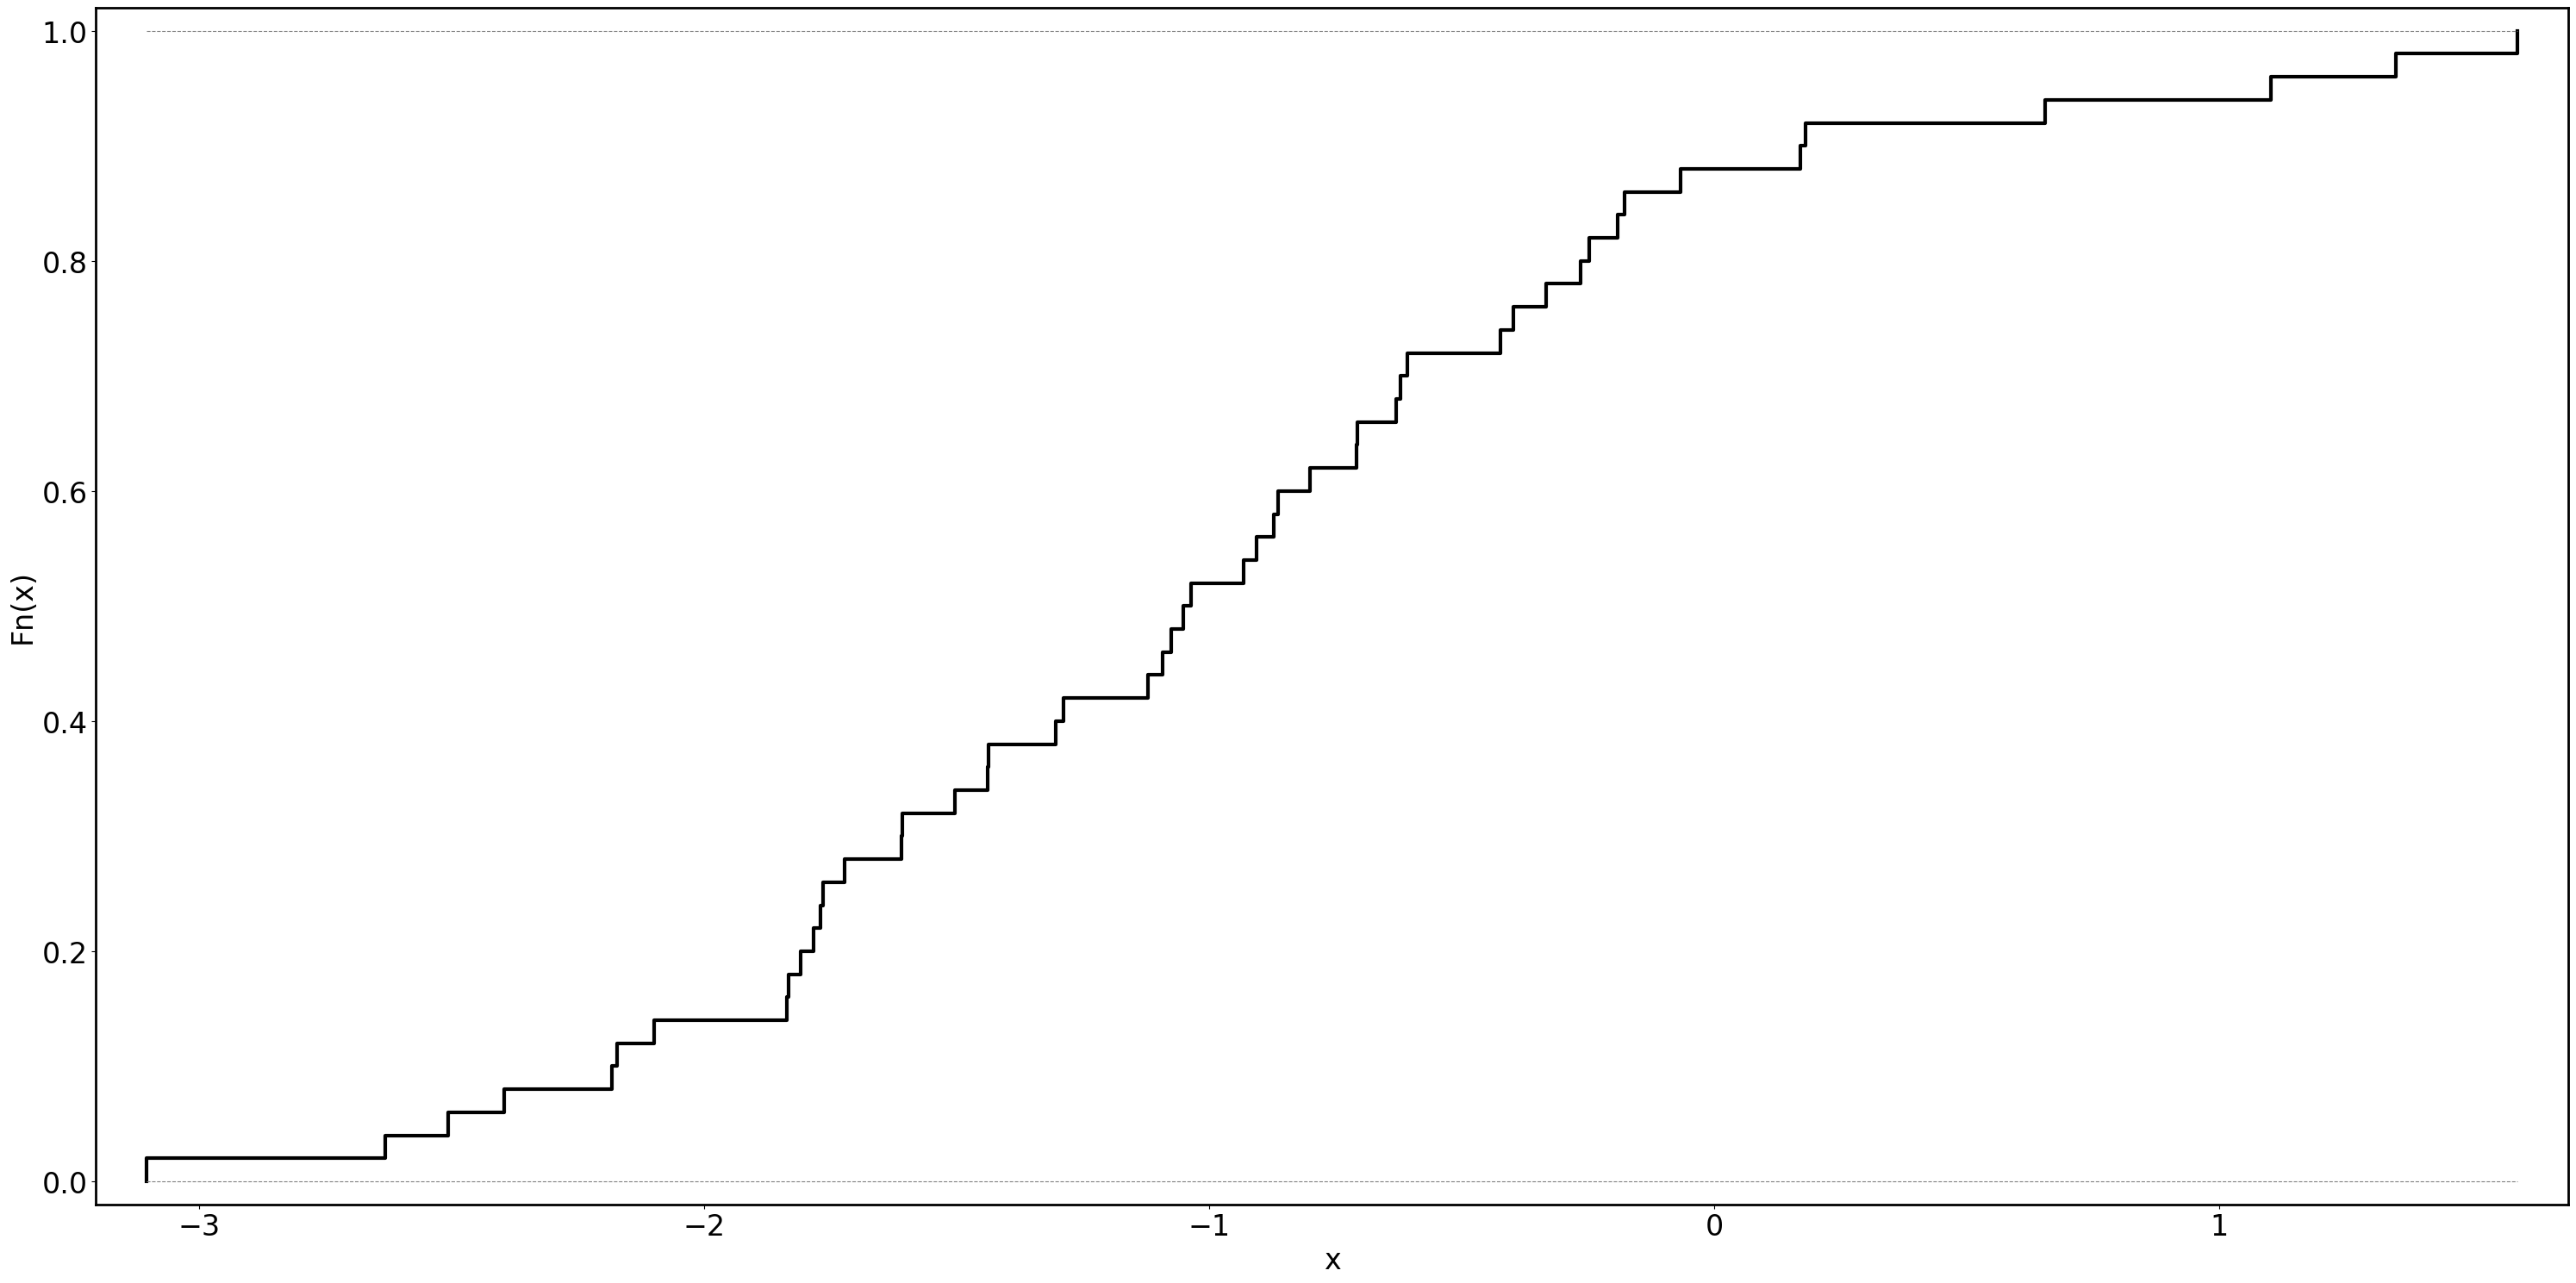

In [3]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(x)
xx = np.linspace(x.min(), x.max(), 400)
yy = ecdf(xx)

fig, ax = plt.subplots(figsize=(30, 15))

ax.step(ecdf.x, ecdf.y, where='post', color='black', linewidth=3)

ax.hlines([0.0, 1.0], xmin=x.min(), xmax=x.max(), 
          colors='gray', linestyles='dashed', linewidth=0.8)

ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('Fn(x)', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.set_xlim(x.min() - 0.1, x.max() + 0.1)
ax.set_ylim(-0.02, 1.02)

ax.grid(False)

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2.0)

plt.tight_layout()
plt.show()


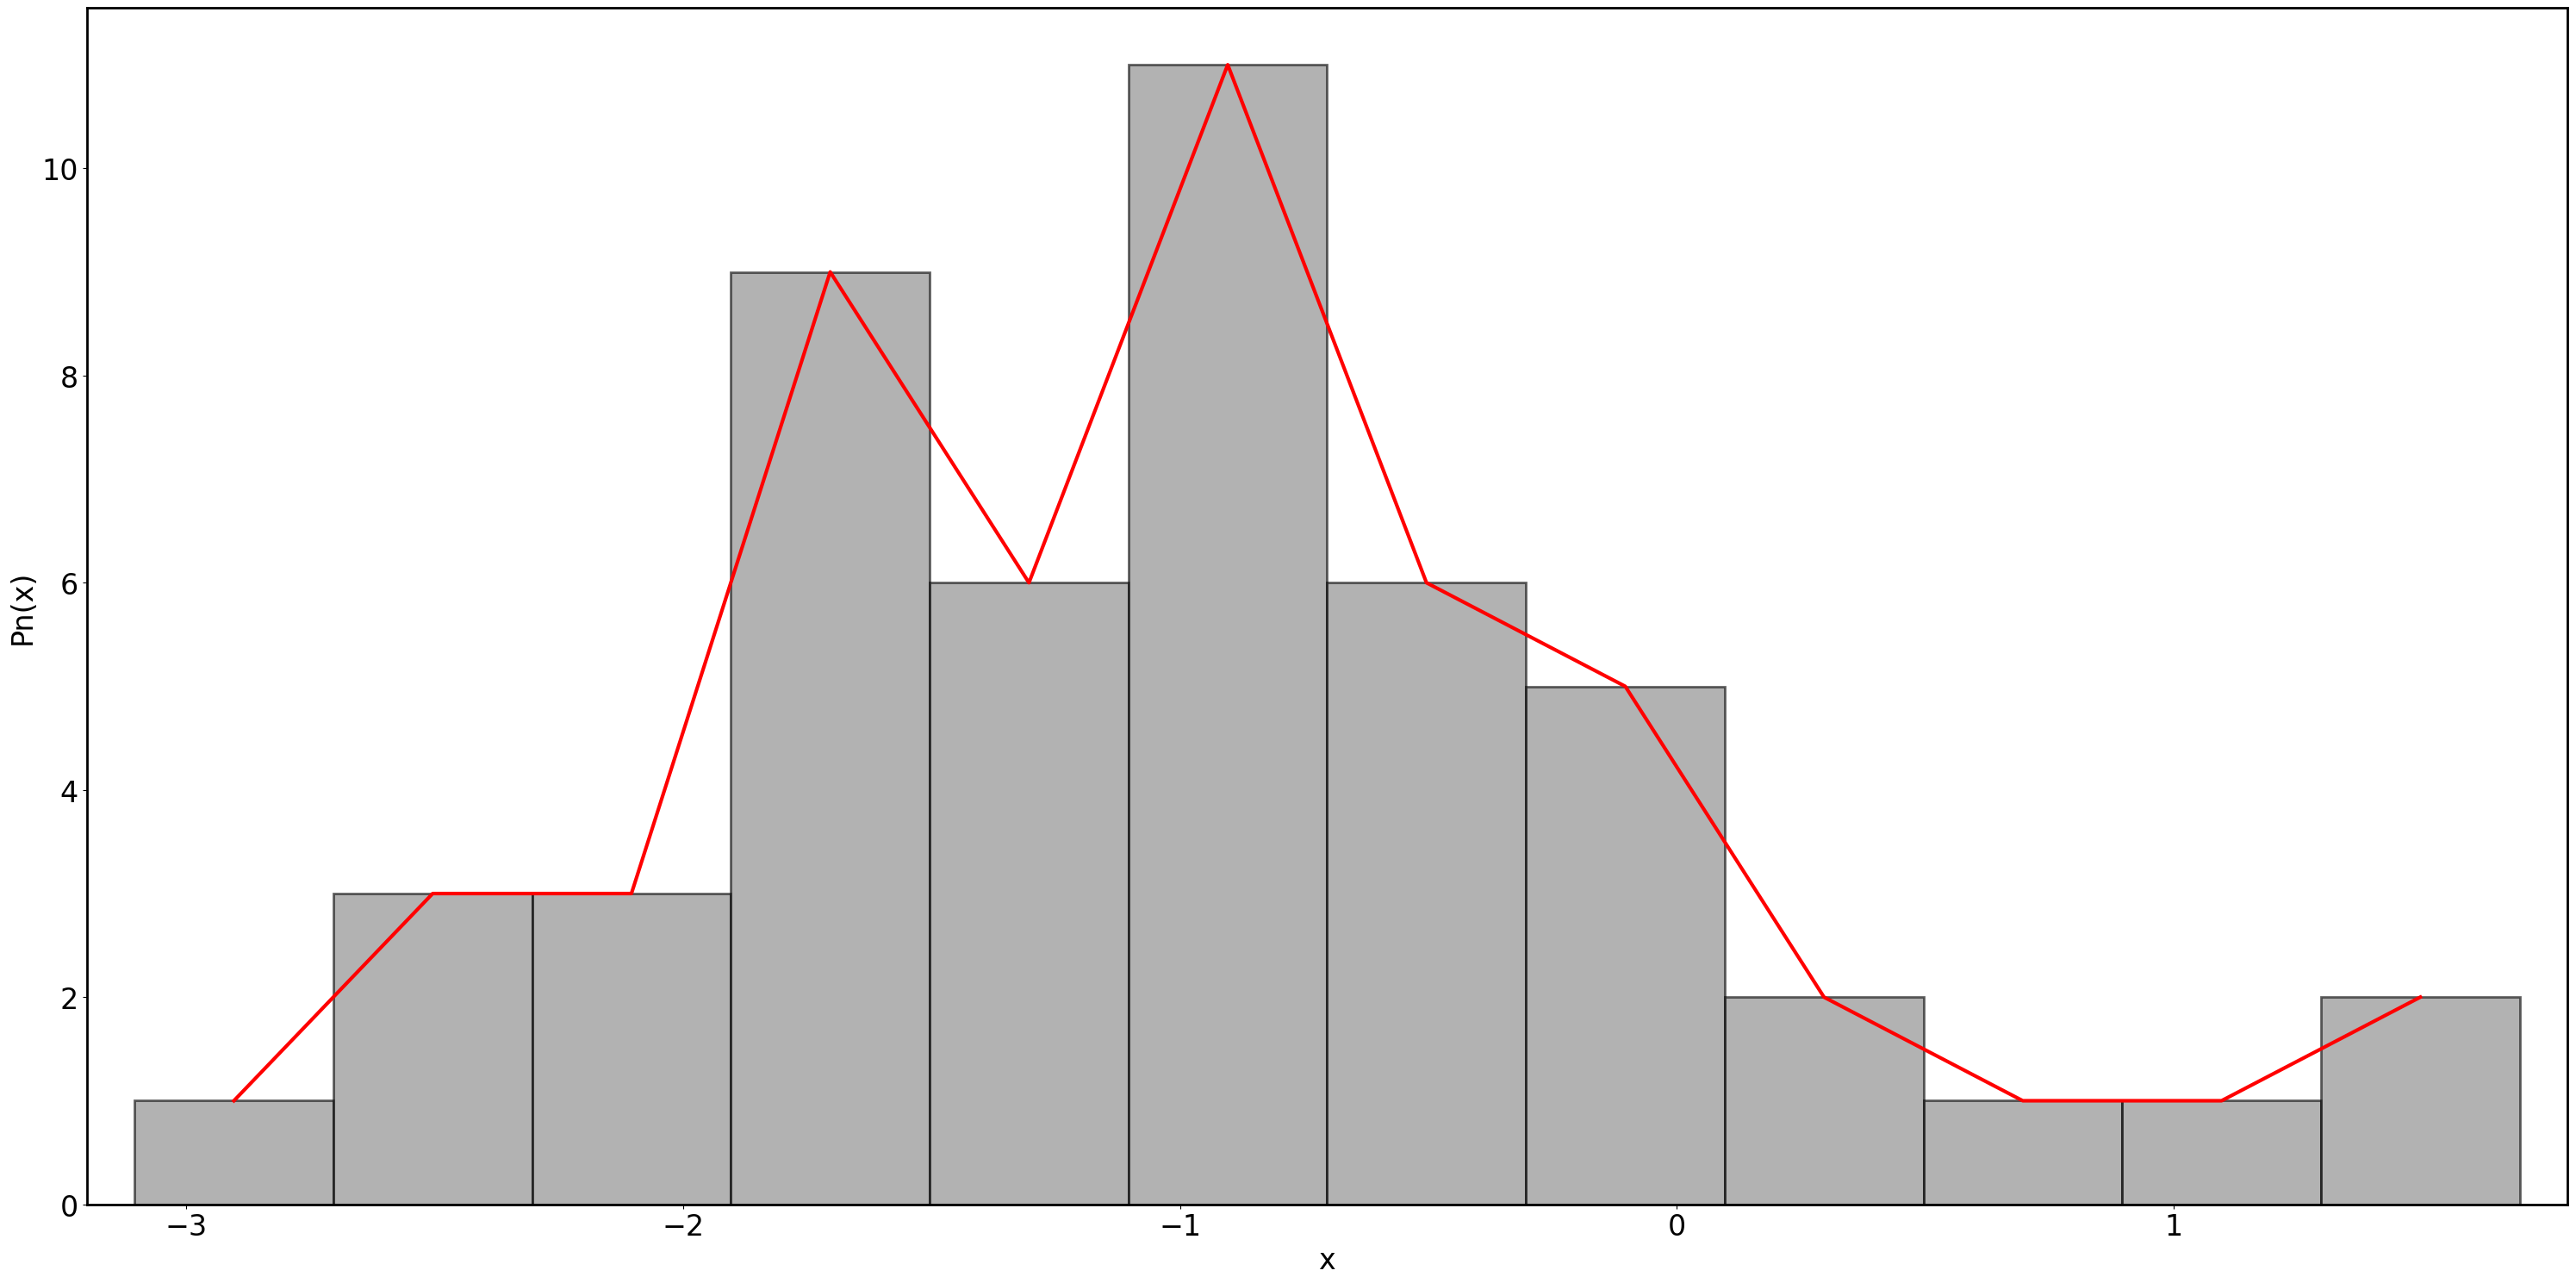

In [4]:
bins = np.arange(x.min(), x.max() + h, h)

fig, ax = plt.subplots(figsize=(30, 15))

counts_hist, edges, _ = ax.hist(
    x, bins=bins, color="gray", alpha=0.6,
    edgecolor='black', linewidth=2.0, label='Гистограмма'
)

midpoints = (edges[:-1] + edges[1:]) / 2
ax.plot(midpoints, counts_hist, color='red', linewidth=3, label='Полигон частот')

ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('Pn(x)', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.grid(False)

ax.margins(x=0.02, y=0.05)

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2.0)

plt.tight_layout()
plt.show()


# Задание 2

In [5]:
x_mean = np.mean(x)
x_var = np.var(x)
x_med = np.median(x)

skew = stats.skew(x, bias=True)
kurt_excess = stats.kurtosis(x, fisher=True, bias=True)

prob_cd = np.mean((x >= c) & (x <= d))

print(f"Мат. ожидание: {x_mean:.4f}")
print(f"Дисперсия: {x_var:.4f}")
print(f"Медиана: {x_med:.4f}")
print(f"Ассиметрия: {skew:.4f}")
print(f"Эксцесс: {kurt_excess:.4f}")
print(f"Вероятность: {prob_cd:.4f}")

Мат. ожидание: -0.9973
Дисперсия: 0.9705
Медиана: -1.0440
Ассиметрия: 0.4619
Эксцесс: 0.2495
Вероятность: 0.2000


# Задание 3

# Задание 4

In [ ]:
n = len(x)
mean_x = np.mean(x)

s_biased = np.std(x) 
s2_biased = np.var(x)

print(f"Объем выборки n = {n}")
print(f"Выборочное среднее mean = {mean_x:.4f}")
print(f"Выборочное с.к.о. (смещенное) s = {s_biased:.4f}")
print(f"Выборочная дисперсия (смещенная) s^2 = {s2_biased:.4f}")
print("-" * 30)


t_crit = stats.t.ppf(1 - alpha2 / 2, df=n - 1)

margin_a = t_crit * (s_biased / np.sqrt(n - 1))

ci_a_lower = mean_x - margin_a
ci_a_upper = mean_x + margin_a

print("4.1 Доверительный интервал для среднего a:")
print(f"   Квантиль t_{{0.995, 49}} = {t_crit:.4f}")
print(f"   Погрешность (margin) = {margin_a:.4f}")
print(f"   Интервал: ({ci_a_lower:.4f}; {ci_a_upper:.4f})")
print("-" * 30)


chi2_lower_crit = stats.chi2.ppf(alpha2 / 2, df=n - 1)
chi2_upper_crit = stats.chi2.ppf(1 - alpha2 / 2, df=n - 1)

# Формула интервала:
# (n * s^2) / chi2_upper  <= sigma^2 <= (n * s^2) / chi2_lower
numerator = n * s2_biased

ci_sigma2_lower = numerator / chi2_upper_crit
ci_sigma2_upper = numerator / chi2_lower_crit

print("4.2 Доверительный интервал для дисперсии sigma^2:")
print(f"   Квантиль chi2_{{0.005, 49}} (нижний) = {chi2_lower_crit:.4f}")
print(f"   Квантиль chi2_{{0.995, 49}} (верхний) = {chi2_upper_crit:.4f}")
print(f"   Числитель n*s^2 = {numerator:.4f}")
print(f"   Интервал: ({ci_sigma2_lower:.4f}; {ci_sigma2_upper:.4f})")


Объем выборки n = 50
Выборочное среднее mean = -0.9973
Выборочное с.к.о. (смещенное) s = 0.9851
Выборочная дисперсия (смещенная) s^2 = 0.9705
------------------------------
4.1 Доверительный интервал для среднего a:
   Квантиль t_{0.995, 49} = 2.6800
   Погрешность (margin) = 0.3772
   Интервал: (-1.3745; -0.6201)
------------------------------
4.2 Доверительный интервал для дисперсии sigma^2:
   Квантиль chi2_{0.005, 49} (нижний) = 27.2493
   Квантиль chi2_{0.995, 49} (верхний) = 78.2307
   Числитель n*s^2 = 48.5252
   Интервал: (0.6203; 1.7808)


# Задание 5

In [ ]:
from scipy.special import kolmogorov
from scipy.optimize import bisect  

n = len(x)

Fn_minus = np.arange(0, n) / n
Fn_plus  = np.arange(1, n+1) / n

z = (x_sorted - a0) / sigma0
F0 = stats.norm.cdf(z)

u = np.abs(F0 - Fn_minus)
v = np.abs(Fn_plus - F0)

max_uv = np.maximum(u, v)
D_n = np.max(max_uv)
k_star = np.argmax(max_uv)

print("k*, где максимум D_n:", k_star + 1)
print("X_k* =", x_sorted[k_star])
print("F_n(X_k-) =", Fn_minus[k_star])
print("F_n(X_k+) =", Fn_plus[k_star])
print("F_0(X_k)   =", F0[k_star])
print("|F_n(X_k-) - F_0(X_k)| =", u[k_star])
print("|F_n(X_k+) - F_0(X_k)| =", v[k_star])
print("D_n =", D_n)

T = np.sqrt(n) * D_n
print("sqrt(n) * D_n =", T)

def K(t):
    return 1.0 - kolmogorov(t)

def f_root(t):
    return K(t) - (1 - alpha2)

x_alpha = bisect(f_root, 0.0, 5.0)
print("Критическое значение x_alpha для alpha2 =", alpha2, "равно", x_alpha)

if T > x_alpha:
    print("Вывод: на уровне значимости", alpha2, "гипотеза H0 ОТВЕРГАЕТСЯ.")
else:
    print("Вывод: на уровне значимости", alpha2, "нет оснований отвергнуть H0.")

cdf_K = K(T)
p_value = 1.0 - cdf_K
print("p-value (максимальный уровень значимости) =", p_value)

z_sample = (x - a0) / sigma0
D_scipy, p_scipy = stats.kstest(z_sample, 'norm')

print("\nПроверка через scipy.stats.kstest:")
print("D_n (по определению) =", D_n)
print("D_n (scipy)          =", D_scipy)
print("p-value (scipy)      =", p_scipy)

k*, где максимум D_n: 2
X_k* = -2.632
F_n(X_k-) = 0.02
F_n(X_k+) = 0.04
F_0(X_k)   = 0.9143439619462183
|F_n(X_k-) - F_0(X_k)| = 0.8943439619462182
|F_n(X_k+) - F_0(X_k)| = 0.8743439619462182
D_n = 0.8943439619462182
sqrt(n) * D_n = 6.323966802054145
Критическое значение x_alpha для alpha2 = 0.01 равно 1.6276236115197662
Вывод: на уровне значимости 0.01 гипотеза H0 ОТВЕРГАЕТСЯ.
p-value (максимальный уровень значимости) = 0.0

Проверка через scipy.stats.kstest:
D_n (по определению) = 0.8943439619462182
D_n (scipy)          = 0.8943439619462182
p-value (scipy)      = 3.176846006679552e-49


In [ ]:
n = len(x)
bins = np.arange(x.min(), x.max() + h, h)


Границы интервалов: [-3.104 -2.704 -2.304 -1.904 -1.504 -1.104 -0.704 -0.304  0.096  0.496
  0.896  1.296  1.696]
Наблюдаемые частоты n_j: [ 1  3  3  9  6 11  6  5  2  1  1  2] сумма = 50
Теоретические вероятности p_j: [8.76386392e-02 5.25448024e-02 2.69018446e-02 1.17609654e-02
 4.39036808e-03 1.39940192e-03 3.80848590e-04 8.84939893e-05
 1.75553096e-05 2.97315147e-06 4.29851909e-07 5.30508749e-08]
Ожидаемые частоты n*p_j: [4.38193196e+00 2.62724012e+00 1.34509223e+00 5.88048270e-01
 2.19518404e-01 6.99700962e-02 1.90424295e-02 4.42469947e-03
 8.77765482e-04 1.48657574e-04 2.14925955e-05 2.65254375e-06] сумма = 9.25631877413735
Минимальная ожидаемая частота = 2.6525437457625145e-06

chi^2 статистика = 1575289.2533750508
Степени свободы df = 11
Критическое значение chi^2_(1-alpha2, df) = 24.724970311318277
p-value = 0.0
Вывод: на уровне значимости 0.01 гипотеза H0 ОТВЕРГАЕТСЯ.

Интерпретация p-value:
alpha_max (наибольший уровень значимости, при котором H0 ещё не отвергается) = 0.0


# Задание 6

In [7]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize



h = 0.4
bins_orig = np.arange(x.min(), x.max() + h, h)

new_bins = np.concatenate([
    [bins_orig[0]],
    bins_orig[3:9],
    [bins_orig[-1]]
])

print("Новые границы (числовые):", new_bins)

n_j, _ = np.histogram(x, bins=new_bins)
r = len(n_j)
print("Частоты n_j:", n_j)
print("Сумма частот:", n_j.sum())


def print_p_value(stat_val, df_val):
    p_val_float = stats.chi2.sf(stat_val, df_val)
    if p_val_float > 0 and p_val_float > 1e-16:
        print(f"P-value: {p_val_float:.4f}")
    else:
        try:
            log_p_val = stats.chi2.logsf(stat_val, df_val)
        except:
            log_p_val = -np.inf
        
        if np.isneginf(log_p_val):
             print(f"P-value: 0.0 (точное значение < 1e-308)")
        else:
            log10_p = log_p_val / np.log(10)
            exp10 = int(np.floor(log10_p))
            mantissa = 10**(log10_p - exp10)
            print(f"P-value: {p_val_float} (точное: {mantissa:.2f}e{exp10})")


# --- ЗАДАНИЕ 6 (Простая гипотеза) ---
a0, sigma0 = -4.0, 1.0

z_boundaries = (new_bins - a0) / sigma0
z_boundaries[0] = -np.inf
z_boundaries[-1] = np.inf

p_j_0 = np.diff(stats.norm.cdf(z_boundaries))

print("\n--- Задание 6 ---")
print("Теоретические вероятности p_j (сумма должна быть 1):", p_j_0.sum())
print(p_j_0)

chi2_obs = np.sum((n_j - n * p_j_0)**2 / (n * p_j_0))
df_6 = r - 1
chi2_crit_6 = stats.chi2.ppf(1 - alpha2, df_6)

print(f"Chi2 наблюдаемое: {chi2_obs:.2f}")
print(f"Критическое значение (df={df_6}): {chi2_crit_6:.2f}")
print_p_value(chi2_obs, df_6)
print("Вывод:", "Отвергаем H0" if chi2_obs > chi2_crit_6 else "Принимаем H0")


Новые границы (числовые): [-3.104 -1.904 -1.504 -1.104 -0.704 -0.304  0.096  1.696]
Частоты n_j: [ 7  9  6 11  6  5  6]
Сумма частот: 50

--- Задание 6 ---
Теоретические вероятности p_j (сумма должна быть 1): 1.0
[9.81958905e-01 1.17609654e-02 4.39036808e-03 1.39940192e-03
 3.80848590e-04 8.84939893e-05 2.10174964e-05]
Chi2 наблюдаемое: 43779.84
Критическое значение (df=6): 16.81
P-value: 0.0 (точное значение < 1e-308)
Вывод: Отвергаем H0

--- Задание 7 ---
Оценки: a = -1.0071, sigma = 0.8828
Chi2 минимум: 2.6365
Критическое значение (df=4): 13.2767
P-value: 0.6204
Вывод: Нет оснований отвергать H0


# Задание 7

In [8]:
# --- ЗАДАНИЕ 7 (Сложная гипотеза) ---

def get_chi2_complex(theta):
    a, sigma = theta
    if sigma <= 1e-6: return 1e20

    z_bounds = (new_bins - a) / sigma
    z_bounds[0] = -np.inf
    z_bounds[-1] = np.inf
    
    probs = np.diff(stats.norm.cdf(z_bounds))

    probs = np.maximum(probs, 1e-12)
    
    expected = n * probs
    return np.sum((n_j - expected)**2 / expected)


res = minimize(get_chi2_complex, x0=[np.mean(x), np.std(x, ddof=1)])
a_hat, sigma_hat = res.x
chi2_min = res.fun

m = 2
df_7 = r - 1 - m
chi2_crit_7 = stats.chi2.ppf(1 - alpha2, df_7)

print("\n--- Задание 7 ---")
print(f"Оценки: a = {a_hat:.4f}, sigma = {sigma_hat:.4f}")
print(f"Chi2 минимум: {chi2_min:.4f}")
print(f"Критическое значение (df={df_7}): {chi2_crit_7:.4f}")
print_p_value(chi2_min, df_7)
print("Вывод:", "Отвергаем H0" if chi2_min > chi2_crit_7 else "Нет оснований отвергать H0")


--- Задание 7 ---
Оценки: a = -1.0071, sigma = 0.8828
Chi2 минимум: 2.6365
Критическое значение (df=4): 13.2767
P-value: 0.6204
Вывод: Нет оснований отвергать H0
